In [64]:
# Dependencies
from config import login_pwd
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
from sqlalchemy import create_engine
engine = create_engine(f'postgresql://{login_pwd}@localhost:5432/EmployeeSQL')
connection = engine.connect()



In [65]:
salary = pd.read_sql("SELECT * FROM salaries", connection)
salary.head()


,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


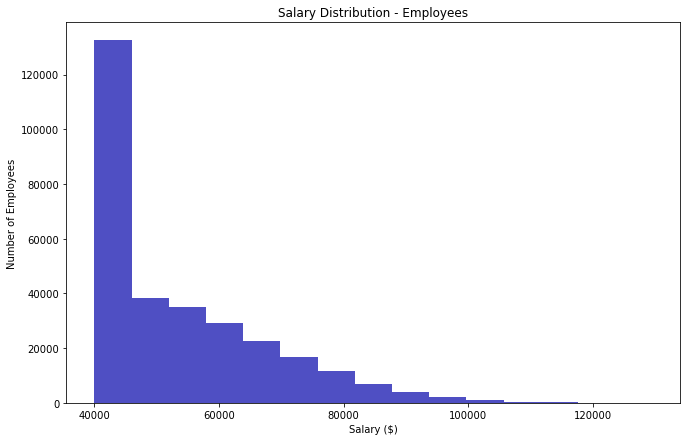

In [68]:
# plot histogram 
plt.figure(figsize=(11,7))

plt.hist(salary['salary'], bins=15, color='#0504aa',alpha=0.7)
binwidth=12
plt.xlabel('Salary ($)')
plt.ylabel('Number of Employees')
plt.title('Salary Distribution - Employees')
plt.show()


In [70]:
# average salary by title (join on emp_no, emp_title_id, title_ID from tables: employees, titles, salaries)  
avg_salary = pd.read_sql("""SELECT ROUND(AVG(salary),2) "Average Salary",title FROM employees e 
JOIN salaries s
ON e.emp_no = s.emp_no
JOIN titles t
ON e.emp_title_id = t."title_ID"
GROUP BY title""", connection)
avg_salary




,Average Salary,title
0,48564.43,Assistant Engineer
1,48535.34,Engineer
2,51531.04,Manager
3,48506.80,Senior Engineer
4,58550.17,Senior Staff
5,58465.38,Staff
6,48582.90,Technique Leader


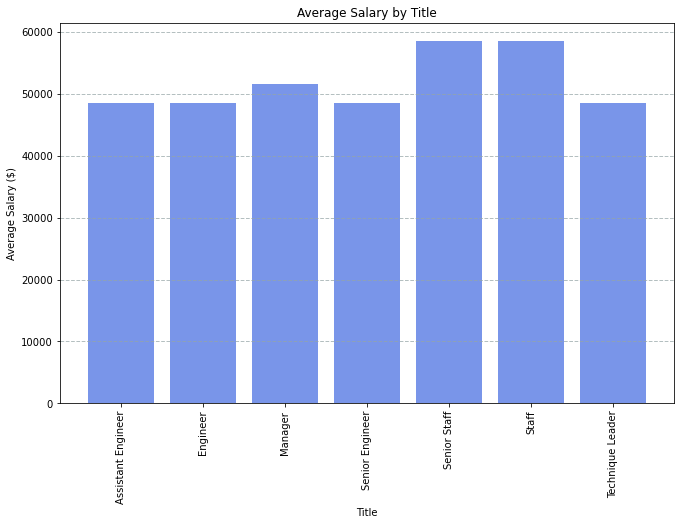

In [71]:
#plot bar chart
data_salary = avg_salary["Average Salary"]
title = avg_salary["title"]
plt.figure(figsize=(11,7))
plt.xticks(range(len(data_salary)), avg_salary["title"], rotation = 90)
plt.xlabel('Title')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Title')
plt.bar(range(len(data_salary)), data_salary, color='royalblue', alpha=0.7)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.7) 
plt.show()